# Project – Revenue Prediction

## Problem Statement:
Create a machine learning model to predict revenue of the restaurant based on the features present in the dataset.

## EDA

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [128]:
df = pd.read_csv('revenue_prediction.csv')
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [130]:
df.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [131]:
df.isna().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

## Data Visualization

In [132]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


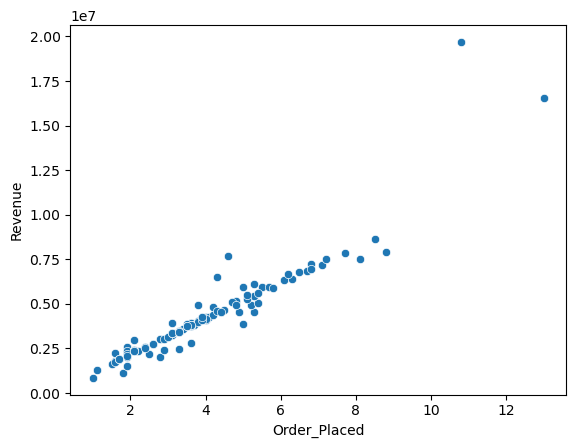

In [133]:
sns.scatterplot(data=df, x='Order_Placed', y='Revenue')
plt.show()

In [134]:
Total_Rev_per_Category = df.groupby('Category').agg(Total_Revenue=('Revenue', 'sum')).sort_values('Total_Revenue', ascending=False).reset_index()
Total_Rev_per_Category

,Category,Total_Revenue
0,Varied Menu,88159648
1,Burger,38548779
2,Pizza,38469999
3,Mexican,36817925
4,Steak,29798662
5,Bakery Cafe,28749002
6,Sandwich,28032069
7,Family Style,25132641
8,BBQ,22169931
9,Italian/Pizza,21234283


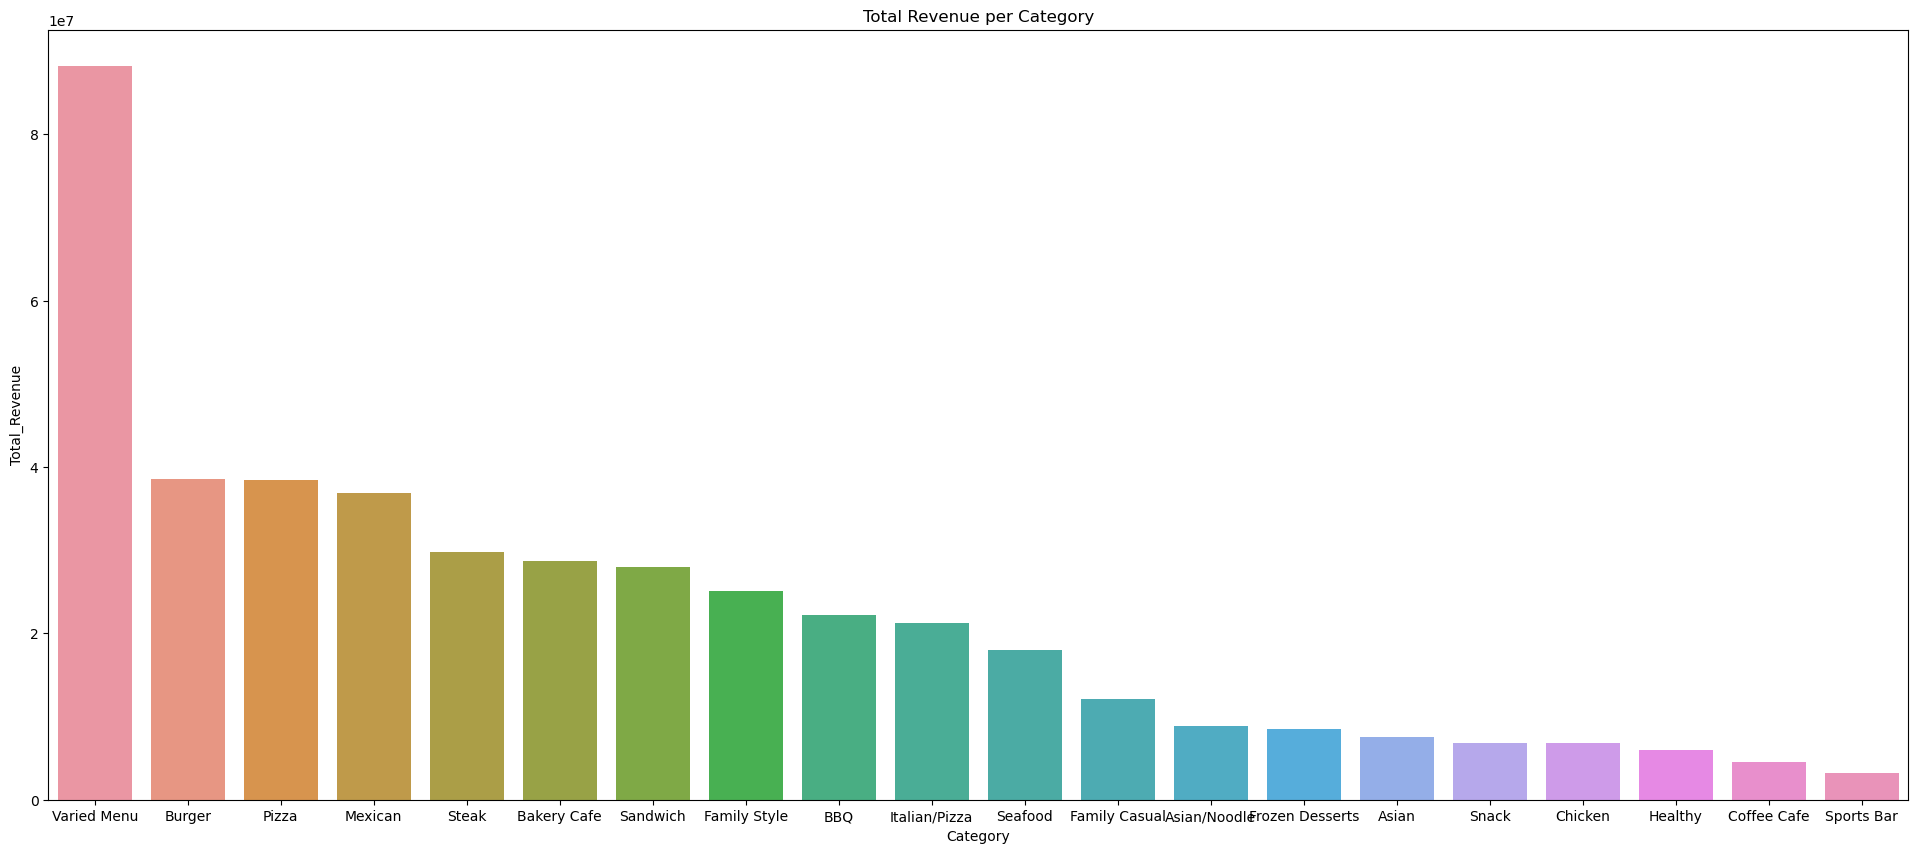

In [135]:
plt.figure(figsize=(24,10))
sns.barplot(data=Total_Rev_per_Category, x='Category', y='Total_Revenue')
plt.title("Total Revenue per Category")
plt.show()

In [136]:
Total_Rev_per_City = df.groupby('City').agg(Total_Revenue=('Revenue', 'sum')).sort_values('Total_Revenue', ascending=False).reset_index()
Total_Rev_per_City

,City,Total_Revenue
0,Bengaluru,201297251
1,Mumbai,81588168
2,Noida,75742276
3,Pune,42632372
4,Gurugram,38256023


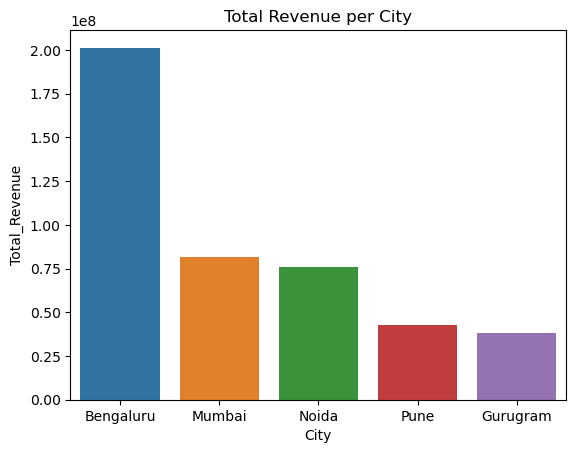

In [137]:
sns.barplot(data=Total_Rev_per_City, x='City', y='Total_Revenue')
plt.title("Total Revenue per City")
plt.show()

In [138]:
Total_Rev_per_Franchise = df.groupby('Franchise').agg(Total_Revenue=('Revenue', 'sum')).reset_index().sort_values('Total_Revenue', ascending=False)
Total_Rev_per_Franchise

,Franchise,Total_Revenue
1,Yes,248169895
0,No,191346195


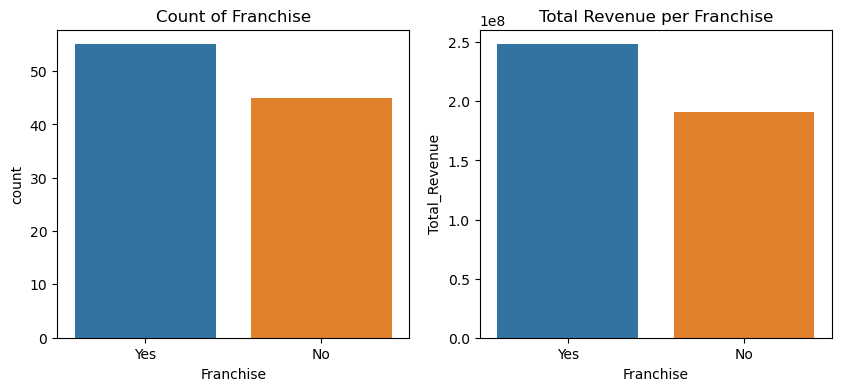

In [139]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x='Franchise')
plt.title("Count of Franchise")

plt.subplot(1,2,2)
sns.barplot(data=Total_Rev_per_Franchise, x='Franchise', y='Total_Revenue')
plt.title("Total Revenue per Franchise")
plt.show()

---
# Creating Model

In [140]:
le = LabelEncoder()
## converting all categorical variables to int
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])

In [141]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,40,1,12,0,55,5.5,5953753
1,102,14,0,19,1,72,6.8,7223131
2,103,16,1,5,4,25,1.9,2555379
3,104,60,1,11,2,18,2.5,2175511
4,105,68,1,13,3,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,96,0,11,0,19,1.1,1270499
96,197,47,1,19,0,75,6.3,6412623
97,198,35,1,19,1,77,6.2,6694797
98,199,41,1,17,4,25,2.1,2344689


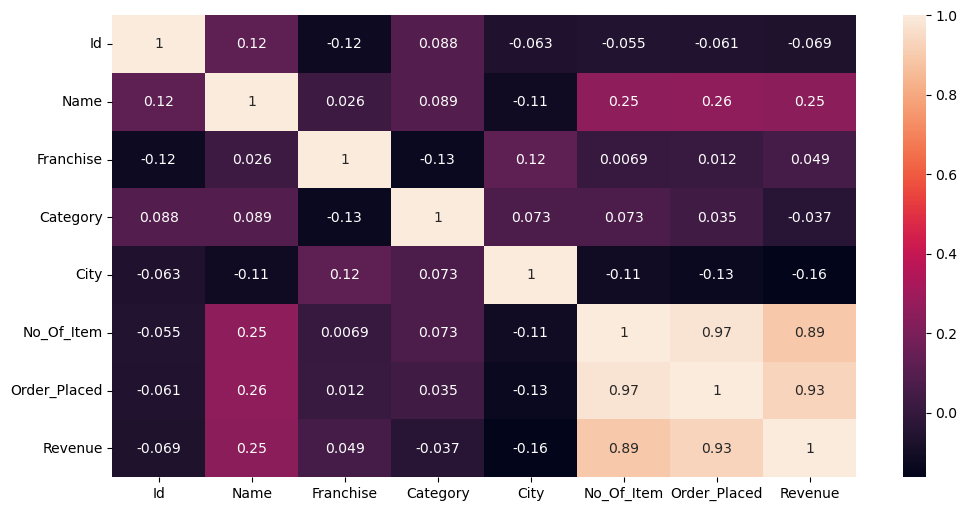

In [142]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## VIF

In [143]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='Revenue')):
        col_list.append(col)

	# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0            Id    9.476687
1          Name    4.358419
2     Franchise    2.167583
3      Category    5.234237
4          City    2.044211
5    No_Of_Item  113.558852
6  Order_Placed   98.322943


In [144]:
df.drop(columns=['No_Of_Item'], inplace=True)

In [145]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='Revenue')):
        col_list.append(col)

	# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature       VIF
0            Id  9.175354
1          Name  4.358381
2     Franchise  2.166365
3      Category  5.045470
4          City  2.031531
5  Order_Placed  4.816612


In [146]:
df.drop(columns=['Id'], inplace=True)

In [147]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object') & (col!='Revenue')):
        col_list.append(col)

	# Returns a dataframe with VIF 
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature       VIF
0          Name  3.864410
1     Franchise  2.069206
2      Category  3.821839
3          City  1.933211
4  Order_Placed  4.221399


In [148]:
df

,Name,Franchise,Category,City,Order_Placed,Revenue
0,40,1,12,0,5.5,5953753
1,14,0,19,1,6.8,7223131
2,16,1,5,4,1.9,2555379
3,60,1,11,2,2.5,2175511
4,68,1,13,3,4.2,4816715
...,...,...,...,...,...,...
95,96,0,11,0,1.1,1270499
96,47,1,19,0,6.3,6412623
97,35,1,19,1,6.2,6694797
98,41,1,17,4,2.1,2344689


## Linear Regression

In [149]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [150]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [152]:
y_pred = lr.predict(X_test)

In [153]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 955717.8811760325
Mean Absolute Percentage Error: 0.11810836566918544
Mean Squared Error: 4623084046666.54
Root Mean Squared Error: 2150135.8205161225
R2 Score: 0.7703141501344545


## Decision Tree

In [154]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [155]:
y_pred = dec_tree.predict(X_test)

In [156]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 1648850.0
Mean Absolute Percentage Error: 0.21482551037437053
Mean Squared Error: 10445416037473.6
Root Mean Squared Error: 3231936.8863691627
R2 Score: 0.48104680002600586


## Random Forest

In [157]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train,y_train)

RandomForestRegressor()

In [158]:
y_pred = rand_forest.predict(X_test)

In [159]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 1423804.5205
Mean Absolute Percentage Error: 0.1613917528630104
Mean Squared Error: 10498871797626.7
Root Mean Squared Error: 3240196.259121768
R2 Score: 0.4783909902728116


# Linear Regression appears to be the most accurate model out of all 3